# Setup

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Loading data

In [2]:
links = pd.read_csv('./ml-32m/links.csv')
movies = pd.read_csv('./ml-32m/movies.csv')
ratings = pd.read_csv('./ml-32m/ratings.csv')
tags = pd.read_csv('./ml-32m/tags.csv')

# EDA

In [3]:
dfs = {
    "### Links": links,
    "### Movies": movies,
    "### Ratings": ratings,
    "### Tags": tags
}

# Render the DataFrames with titles
for title, df in dfs.items():
    display(Markdown(title))
    display(df.head(3).style.set_table_attributes("style='display:inline'"))
    display(Markdown("<br>"))

### Links

,movieId,imdbId,tmdbId
0,1,114709,862.000000
1,2,113497,8844.000000
2,3,113228,15602.000000


<br>

### Movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


<br>

### Ratings

,userId,movieId,rating,timestamp
0,1,17,4.000000,944249077
1,1,25,1.000000,944250228
2,1,29,2.000000,943230976


<br>

### Tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469


<br>

We can see that the tables contain the following features:

- Links
    - movieId:
    - imdbId:
    - tmbdbId:
- Movies
    - movieId:
    - title:
    - genres:
- Ratings
    - userId:
    - movieId:
    - rating:
    - timestamp:
- Tags
    - userId:
    - movieId:
    - tag:
    - timestamp:

Looking at the number of items in each table, we see:

In [24]:
# Render the DataFrames with titles
for title, df in dfs.items():
    display(Markdown(title))
    display(df.info())
    display(Markdown("<br>"))

### Links

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


None

<br>

### Movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


None

<br>

### Ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


None

<br>

### Tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB


None

<br>

In total, we have **87,585 different movies** and **32,000,204** different ratings.

In [27]:
ratings['userId'].nunique()

200948

We have ratings for **200,948** different users.

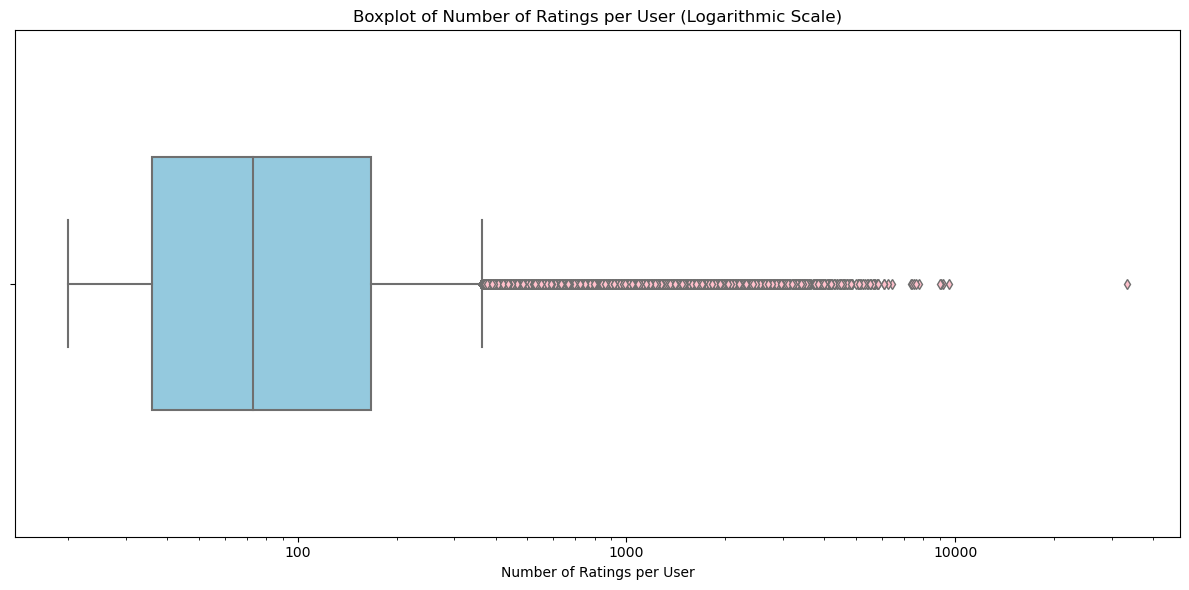

In [48]:
from matplotlib.ticker import LogLocator, LogFormatter

# Compute the number of ratings per user
user_rating_counts = ratings.groupby('userId').size().reset_index(name='rating_count')

# Create the boxplot with data on the x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=user_rating_counts['rating_count'],
    orient='h',
    width=0.5,
    color='skyblue',
    flierprops=dict(markerfacecolor='pink', markersize=5, linestyle='none')
)

# Set the x-axis to logarithmic scale
plt.xscale('log')

# Use LogLocator and LogFormatter to set x-axis ticks dynamically
ax = plt.gca()  # Get the current axes

# Set major ticks at powers of 10
ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.xaxis.set_major_formatter(LogFormatter())

plt.xlabel('Number of Ratings per User')
plt.title('Boxplot of Number of Ratings per User (Logarithmic Scale)')
plt.tight_layout()
plt.show()

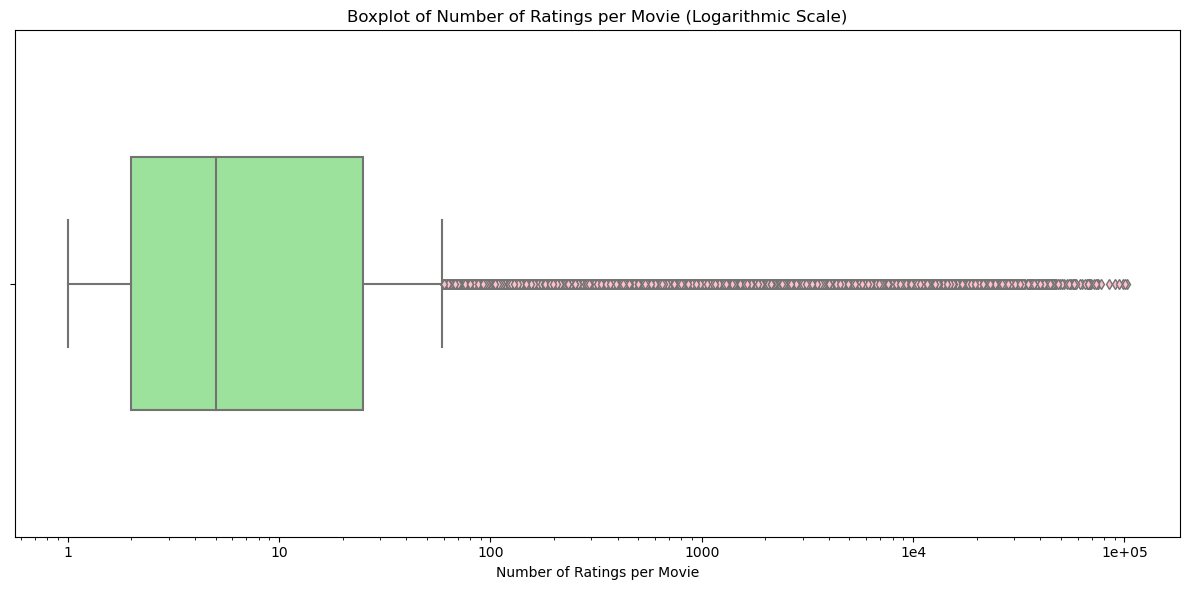

In [50]:
# Compute number of ratings per movie
movie_rating_counts = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Create the boxplot with data on the x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=movie_rating_counts['rating_count'],
    orient='h',
    width=0.5,
    color='lightgreen',
    flierprops=dict(markerfacecolor='pink', markersize=5, linestyle='none')
)

# Set the x-axis to logarithmic scale
plt.xscale('log')

# Use LogLocator and LogFormatter to set x-axis ticks dynamically
ax = plt.gca()
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.xaxis.set_major_formatter(plt.LogFormatter())

plt.xlabel('Number of Ratings per Movie')
plt.title('Boxplot of Number of Ratings per Movie (Logarithmic Scale)')
plt.tight_layout()
plt.show()


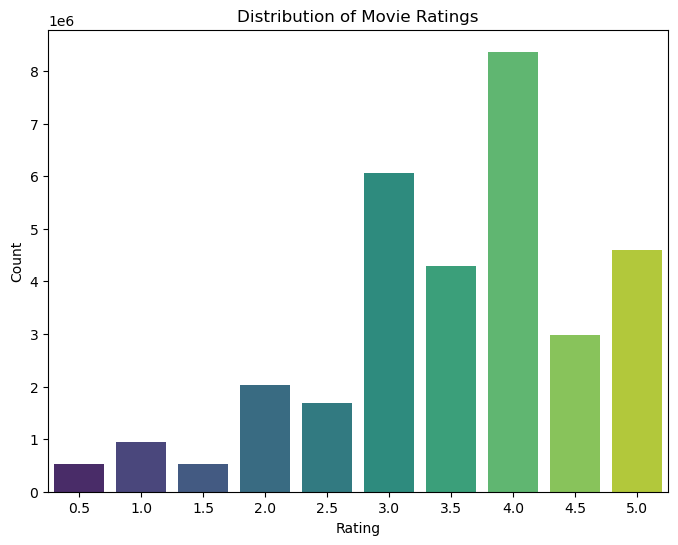

In [5]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

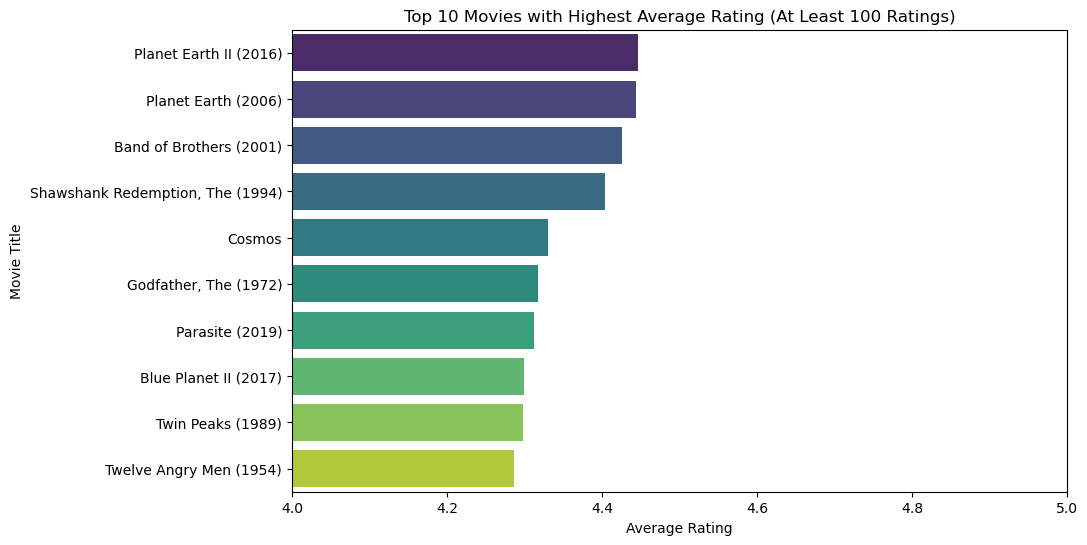

In [6]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='movieId')

# Compute average rating and number of ratings per movie
movie_stats = ratings_movies.groupby('title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter movies with at least 100 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 100]

# Get top 10 movies by average rating
top_movies = popular_movies.sort_values('average_rating', ascending=False).head(10)

# Plot top 10 movies
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='title', data=top_movies, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Average Rating (At Least 100 Ratings)')
plt.xlim(4, 5)
plt.show()

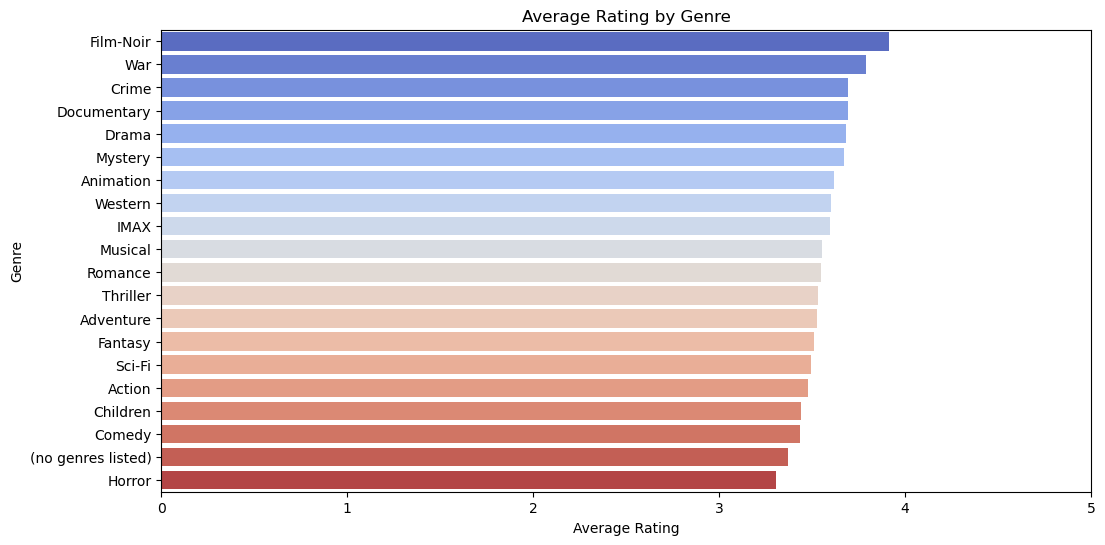

In [11]:
# Split genres into separate rows
movies_genres = movies.copy()
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

# Merge with ratings
ratings_genres = pd.merge(ratings, movies_genres, on='movieId')

# Compute average rating per genre
genre_stats = ratings_genres.groupby('genres')['rating'].mean().reset_index()
genre_stats = genre_stats.sort_values('rating', ascending=False)

# Plot average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=genre_stats, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.xlim(0, 5)
plt.show()

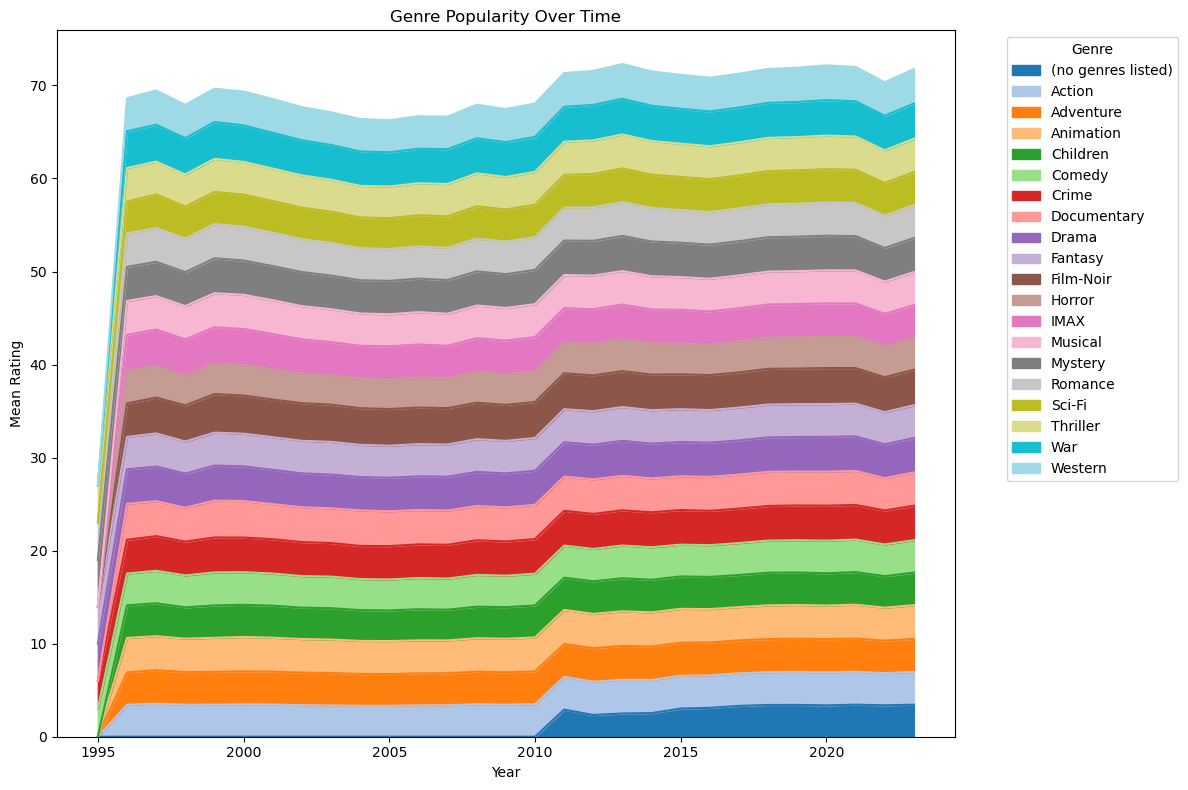

In [13]:
# Compute number of ratings per genre per year
genre_popularity = ratings_genres.groupby(['year', 'genres'])['rating'].mean().reset_index(name='rating_mean')

# Pivot the data
genre_pivot = genre_popularity.pivot(index='year', columns='genres', values='rating_mean').fillna(0)

# Plot area chart
genre_pivot.plot(kind='area', stacked=True, figsize=(12, 8), colormap='tab20')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.title('Genre Popularity Over Time')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()